In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import random
from glob import glob

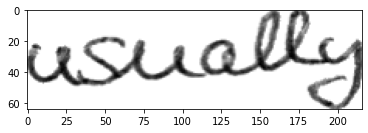

In [ ]:
def read_img(path):
    img = plt.imread(path, 0)
    img = cv2.resize(img, (216, 64))
    return img
img = read_img('./word.png')
plt.imshow(img, cmap='gray')

In [ ]:
fake_ds_path = '/content/drive/MyDrive/Final Project/Datasets/FakeRealWordDs2/fake_words'

# Methods

In [ ]:
def minimize(img, x_range=(0.5, 1), y_range=(0.5, 1)):
    """
    Given a [0, 255] uint8 img, minimize the text inside by the multipliers in each axis
    """
    multX = random.uniform(*x_range)
    multY = random.uniform(*y_range)
    result = np.ones(img.shape) * 255
    h, w = (int(img.shape[0] * multY), int(img.shape[1] * multX))
    small_image = cv2.resize(img.copy(), (w, h))
    low_w = int((216 - w) / 2)
    low_h = int((64 - h) / 2)
    result[low_h:low_h + h, low_w:low_w + w] = small_image
    return result



def fix_brightness(img, low_range=(0, 100), high_range=(180, 255)):
    """
    Fixed brightness by random low and high thresholds ranges(tuples)
    """
    high = random.randint(*high_range)
    low = random.randint(*low_range)
    h, w = img.shape
    new = img.copy()
    for i in range(h):
        for j in range(w):
            current = new[i][j]
            if current > high:
                new[i][j] = random.randint(current, 255)
            elif current < low:
                new[i][j] = random.randint(0, current)
    return new

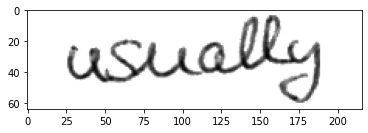

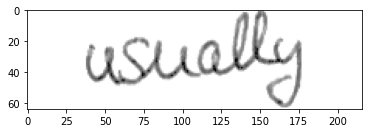

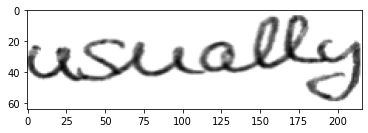

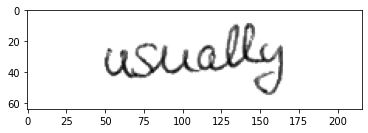

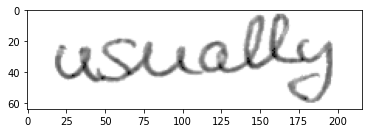

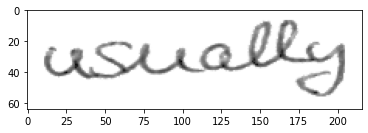

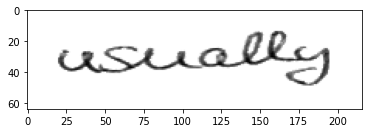

In [ ]:
for i in range(100, 30, -10):
    minimized = minimize(img)
    minimized = fix_brightness(minimized)
    plt.imshow(minimized, cmap='gray')
    plt.show()